In [ ]:
!pip install -q tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 22.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic-core 2.27.2 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
blosc2 3.0.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.3 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
langchain-core 0.3.33 requires typing-

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import numpy as np
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [ ]:
url = "https://drive.google.com/file/d/18uCv1Rj1xDvIH6dQ0wvzuS5EPbry7hYG/view?usp=sharing"
dataset = "https://drive.google.com/uc?export=download&id="+url.split('/')[-2]
#dataset = pd.read_csv(path, header = None)


keypoint_classifier_1 = bs = 256, original

In [ ]:
model_save_path =  "/content/drive/MyDrive/Sign_speak_gesture_recognition/model/keypoint_classifier_1.hdf5"
tflite_save_path = "/content/drive/MyDrive/Sign_speak_gesture_recognition/model/keypoint_classifier_1.tflite"

In [ ]:
dataset

'https://drive.google.com/uc?export=download&id=18uCv1Rj1xDvIH6dQ0wvzuS5EPbry7hYG'

# Dataset reading

In [ ]:
X = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
X

array([[ 0.        ,  0.        , -0.14285715, ..., -0.6753247 ,
         0.18181819, -0.7922078 ],
       [ 0.        ,  0.        ,  0.14666666, ..., -0.6933333 ,
        -0.16      , -0.81333333],
       [ 0.        ,  0.        ,  0.11688311, ..., -0.6753247 ,
        -0.18181819, -0.77922076],
       ...,
       [ 0.        ,  0.        , -0.03773585, ...,  0.509434  ,
        -0.16981132,  0.5660377 ],
       [ 0.        ,  0.        , -0.28301886, ...,  0.8490566 ,
         0.20754717,  0.7169811 ],
       [ 0.        ,  0.        ,  0.34375   , ...,  0.625     ,
         0.09375   ,  0.625     ]], dtype=float32)

In [ ]:
label = np.loadtxt(dataset, delimiter=',', dtype='str', usecols=(0))
label

array(['afraid', 'afraid', 'afraid', ..., 'you', 'you', 'you'],
      dtype='<U10')

In [ ]:
enc = LabelEncoder()
y = enc.fit_transform(label)  # Convert to 1D array
y

array([ 0,  0,  0, ..., 11, 11, 11])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)
print(f"X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"X_test = {X_test.shape}, y_test = {y_test.shape}")

X_train = (5355, 42), y_train = (5355,)
X_test = (1339, 42), y_test = (1339,)


# Model building

In [53]:
NUM_CLASSES = 12
INPUT_SHAPE = 42  # 21 hand keypoints * 2 (x, y)

model = keras.Sequential([
    layers.Input(shape=(INPUT_SHAPE,)),

    layers.Dense(504, activation='relu'),
    layers.Dropout(0.15),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.15),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(NUM_CLASSES, activation='softmax')  # Multi-class classification
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 504)               21672     
                                                                 
 dropout_8 (Dropout)         (None, 504)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               129280    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [41]:
# NUM_CLASSES = 12
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2,)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(40, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     #tf.keras.layers.Dense(40, activation='relu'),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_8 (Dense)             (None, 40)                1720      
                                                                 
 dropout_7 (Dropout)         (None, 40)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                820       
                                                                 
 dense_10 (Dense)            (None, 12)                252       
                                                                 
Total params: 2792 (10.91 KB)
Trainable params: 2792 (10.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Model checkpoint callback (Save FULL model, not just weights)
cp_callback = ModelCheckpoint(
    model_save_path,
    save_best_only=True,  # Save only the best model (optional)
    verbose=1,
    save_weights_only=False  # Ensure it saves the full model
)

# Early stopping callback (Stops training if no improvement)
es_callback = EarlyStopping(
    patience=20,  # Number of epochs to wait before stopping
    verbose=1,
    restore_best_weights=True  # Restores best model weights
)

In [55]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

_1threelayer_40 : bs = 64

In [56]:
model_history = model.fit(X_train,
                          y_train,
                          epochs=1000,
                          batch_size=32,
                          validation_data=(X_test, y_test),
                          callbacks=[cp_callback, es_callback]
                          )

Epoch 1/1000
165/168 [============================>.] - ETA: 0s - loss: 1.4240 - accuracy: 0.4720
Epoch 1: val_loss improved from inf to 0.78942, saving model to /content/drive/MyDrive/Sign_speak_gesture_recognition/model/keypoint_classifier_1.hdf5
168/168 [==============================] - 2s 5ms/step - loss: 1.4170 - accuracy: 0.4743 - val_loss: 0.7894 - val_accuracy: 0.6990
Epoch 2/1000
 29/168 [====>.........................] - ETA: 0s - loss: 0.8824 - accuracy: 0.6724

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



156/168 [==========================>...] - ETA: 0s - loss: 0.8327 - accuracy: 0.6811
Epoch 2: val_loss improved from 0.78942 to 0.56145, saving model to /content/drive/MyDrive/Sign_speak_gesture_recognition/model/keypoint_classifier_1.hdf5
168/168 [==============================] - 1s 5ms/step - loss: 0.8262 - accuracy: 0.6825 - val_loss: 0.5615 - val_accuracy: 0.7954
Epoch 3/1000
160/168 [===========================>..] - ETA: 0s - loss: 0.6467 - accuracy: 0.7646
Epoch 3: val_loss improved from 0.56145 to 0.45842, saving model to /content/drive/MyDrive/Sign_speak_gesture_recognition/model/keypoint_classifier_1.hdf5
168/168 [==============================] - 1s 5ms/step - loss: 0.6428 - accuracy: 0.7655 - val_loss: 0.4584 - val_accuracy: 0.8275
Epoch 4/1000
163/168 [============================>.] - ETA: 0s - loss: 0.5486 - accuracy: 0.8058
Epoch 4: val_loss improved from 0.45842 to 0.34837, saving model to /content/drive/MyDrive/Sign_speak_gesture_recognition/model/keypoint_classifier

In [57]:
# Extract loss and accuracy from history
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

# Define a threshold to check if losses are too high (possible underfitting)
loss_threshold = 0.5  # Adjust this based on your dataset

# Overfitting: Validation loss increasing while training loss decreases
if val_loss[-1] > val_loss[-5] and train_loss[-1] < train_loss[-5]:
    print("⚠️ Warning: The model is overfitting! Consider using regularization, dropout, or early stopping.")

# Overfitting: Training accuracy is much higher than validation accuracy
elif train_acc[-1] - val_acc[-1] > 0.05:  # 5% accuracy gap
    print("⚠️ Warning: Possible overfitting. Training accuracy is significantly higher than validation accuracy.")

# Underfitting: Both training and validation loss are high, and accuracy is low
elif train_loss[-1] > loss_threshold and val_loss[-1] > loss_threshold:
    print("⚠️ Warning: The model is underfitting. Consider increasing model complexity or training longer.")

# Underfitting: Training and validation accuracy both remain low
elif train_acc[-1] < 0.7 and val_acc[-1] < 0.7:  # Adjust threshold as needed
    print("⚠️ Warning: Possible underfitting. Model is not learning well enough.")

else:
    print("✅ No significant overfitting or underfitting detected.")


✅ No significant overfitting or underfitting detected.


In [58]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

21/21 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9963


In [59]:
import plotly.express as px
# Plot loss and accuracy curves
epochs = list(range(1, len(model_history.history['loss']) + 1))

fig_loss = px.line(x=epochs, y=model_history.history['loss'], labels={'x': 'Epoch', 'y': 'Loss'}, title='Training Loss')
fig_loss.add_scatter(x=epochs, y=model_history.history['val_loss'], mode='lines', name='Validation Loss')
fig_loss.show()

fig_acc = px.line(x=epochs, y=model_history.history['accuracy'], labels={'x': 'Epoch', 'y': 'Accuracy'}, title='Training Accuracy')
fig_acc.add_scatter(x=epochs, y=model_history.history['val_accuracy'], mode='lines', name='Validation Accuracy')
fig_acc.show()

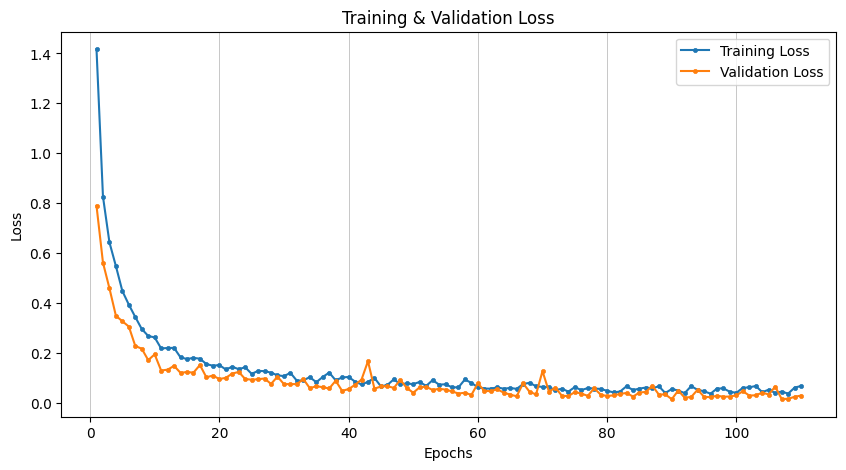

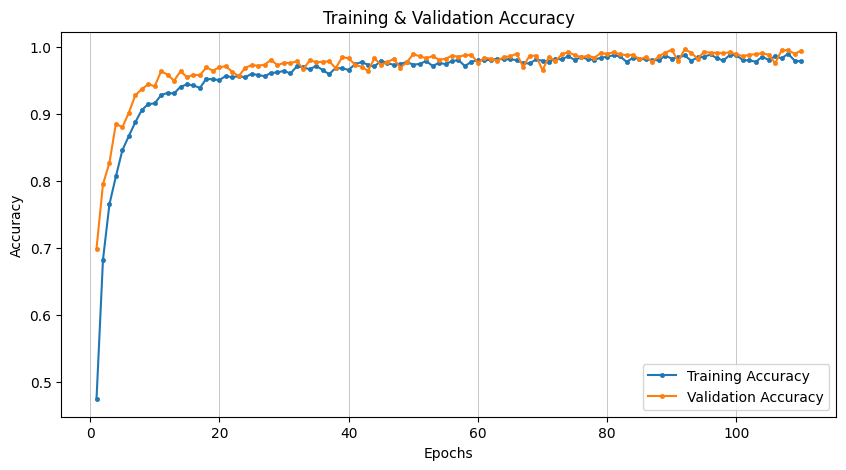

In [100]:
import matplotlib.pyplot as plt

# Extract training history
epochs = range(1, len(model_history.history['loss']) + 1)
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o', markersize=3, markeredgewidth=0.5)
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', markersize=3, markeredgewidth=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(axis='x', linewidth=0.5)  # Show only vertical grid lines
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o', markersize=3, markeredgewidth=0.5)
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o', markersize=3, markeredgewidth=0.5)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(axis='x', linewidth=0.5)  # Show only vertical grid lines
plt.show()


In [80]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [81]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 60ms/step
[2.7669053e-06 3.5900325e-03 1.4963111e-05 2.3821912e-04 2.1894010e-08
 4.0692069e-07 4.8118510e-04 6.1222310e-03 2.4508606e-06 4.9683467e-06
 9.8953027e-01 1.2499645e-05]
10


# Confusion matrix

42/42 [==============================] - 0s 2ms/step
y_test first few values: [10  1 11 10 11  6  6  6  8  9]
y_pred first few values: [10  1 11 10 11  6  6  6  8  9]
Unique values in y_true: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Unique values in y_pred: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Converting indices to class labels...


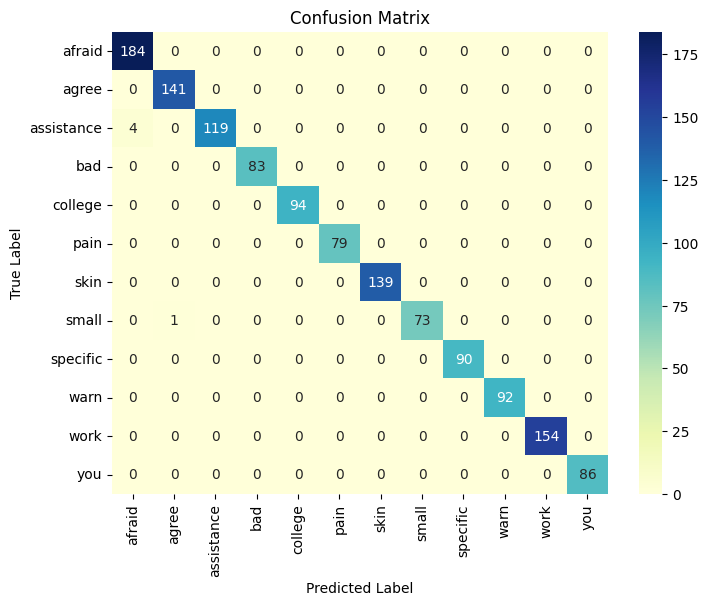


Classification Report
              precision    recall  f1-score   support

      afraid       0.98      1.00      0.99       184
       agree       0.99      1.00      1.00       141
  assistance       1.00      0.97      0.98       123
         bad       1.00      1.00      1.00        83
     college       1.00      1.00      1.00        94
        pain       1.00      1.00      1.00        79
        skin       1.00      1.00      1.00       139
       small       1.00      0.99      0.99        74
    specific       1.00      1.00      1.00        90
        warn       1.00      1.00      1.00        92
        work       1.00      1.00      1.00       154
         you       1.00      1.00      1.00        86

    accuracy                           1.00      1339
   macro avg       1.00      1.00      1.00      1339
weighted avg       1.00      1.00      1.00      1339



In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Define class labels
class_labels = ['afraid', 'agree', 'assistance', 'bad', 'college', 'pain', 'skin',
                'small', 'specific', 'warn', 'work', 'you']

def print_confusion_matrix(y_true, y_pred, report=True):
    """Plot Confusion Matrix & Print Classification Report"""

    # Debugging prints
    print("Unique values in y_true:", np.unique(y_true))
    print("Unique values in y_pred:", np.unique(y_pred))

    # Ensure y_true and y_pred contain class names, not indices
    if isinstance(y_true[0], int) or isinstance(y_true[0], np.integer):
        print("Converting indices to class labels...")
        try:
            y_true = [class_labels[i] for i in y_true]
            y_pred = [class_labels[i] for i in y_pred]
        except IndexError as e:
            print("IndexError:", e)
            print("Check if y_test or y_pred has invalid indices.")

    # Compute Confusion Matrix
    cmx_data = confusion_matrix(y_true, y_pred, labels=class_labels)
    df_cmx = pd.DataFrame(cmx_data, index=class_labels, columns=class_labels)

    # Plot Confusion Matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', cmap="YlGnBu", square=False)  # Changed cmap to 'Blues'
    ax.set_ylim(len(class_labels), 0)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Print Classification Report
    if report:
        print("\nClassification Report")
        print(classification_report(y_true, y_pred, target_names=class_labels))

# Model Predictions
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)  # Convert probabilities to class indices

# Convert y_test to numpy array if it's not already
y_test = np.array(y_test)

# Debugging prints
print("y_test first few values:", y_test[:10])
print("y_pred first few values:", y_pred[:10])

# Call the function
print_confusion_matrix(y_test, y_pred)


42/42 [==============================] - 0s 2ms/step


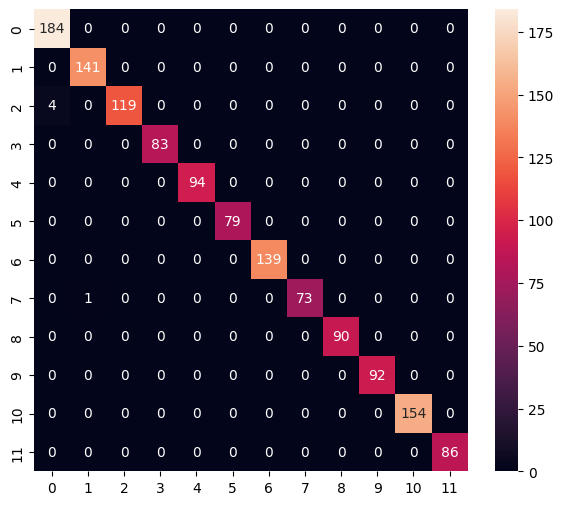

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       184
           1       0.99      1.00      1.00       141
           2       1.00      0.97      0.98       123
           3       1.00      1.00      1.00        83
           4       1.00      1.00      1.00        94
           5       1.00      1.00      1.00        79
           6       1.00      1.00      1.00       139
           7       1.00      0.99      0.99        74
           8       1.00      1.00      1.00        90
           9       1.00      1.00      1.00        92
          10       1.00      1.00      1.00       154
          11       1.00      1.00      1.00        86

    accuracy                           1.00      1339
   macro avg       1.00      1.00      1.00      1339
weighted avg       1.00      1.00      1.00      1339



In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    #labels = sorted(list(set(y_true)))
    labels = ['afraid', 'agree', 'assistance', 'bad', 'college', 'pain', 'skin',
           'small', 'specific', 'warn', 'work', 'you']
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [78]:
import plotly.graph_objects as go

# Class labels
classes = ['afraid', 'agree', 'assistance', 'bad', 'college', 'pain', 'skin',
           'small', 'specific', 'warn', 'work', 'you']

# Scores from Classification Report
precision = [0.98, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
recall = [1.00, 1.00, 0.97, 1.00, 1.00, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 1.00]
f1_score = [0.99, 1.00, 0.98, 1.00, 1.00, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 1.00]

# Define new color scheme
colors = {
    "Precision": "#636EFA",  # Blue
    "Recall": "#EF553B",     # Red-Orange
    "F1-Score": "#00CC96"    # Green
}

# Create interactive bar chart
fig = go.Figure()

fig.add_trace(go.Bar(x=classes, y=precision, name='Precision', marker_color=colors["Precision"]))
fig.add_trace(go.Bar(x=classes, y=recall, name='Recall', marker_color=colors["Recall"]))
fig.add_trace(go.Bar(x=classes, y=f1_score, name='F1-Score', marker_color=colors["F1-Score"]))

# Layout settings
fig.update_layout(
    title="Class-wise Performance (Interactive)",
    xaxis_title="Class Labels",
    yaxis_title="Score",
    barmode='group',  # Groups bars instead of stacking
    legend=dict(title="Click to Highlight"),  # Interactive legend
    template="plotly_white",  # Light theme (can be changed to "plotly_dark")
)

# Show interactive plot
fig.show()

fig.write_html("/content/drive/MyDrive/Sign_speak_gesture_recognition/interactive_plot.html")


# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

8384

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 86 µs, sys: 5 µs, total: 91 µs
Wall time: 88 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.1185922e-07 4.6173107e-02 1.6338882e-04 7.3516525e-02 1.2096261e-11
 2.7295349e-07 8.9619518e-04 2.1041578e-01 2.3874705e-05 3.4739891e-08
 6.6877359e-01 3.7014281e-05]
10
